In [1]:
import sys
sys.path.append('..')

import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from src.data_handler import MNISTAdditionDataset
from src.plot_settings import set_publication_style

# Set plot style for publication quality
set_publication_style()

# Set random seed
seed = 42
np.random.seed(seed)

In [2]:
# Create dataset
dataset = MNISTAdditionDataset(seed=seed)
data = dataset.create_datasets()

# Get training and test data
x_train, y_train, digit_labels = data['train']
x_test, y_test, digit_labels_test = data['test']

# Reshape data for sklearn classifiers (flatten the images)
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

print("Data shapes:")
print(f"Training data: {x_train_flat.shape}")
print(f"Test data: {x_test_flat.shape}")

Data shapes:
Training data: (50000, 1568)
Test data: (10000, 1568)


# Random Forests
the block below took 27 mins to run on my laptop



Training Standard Random Forest...
Standard Random Forest Test Accuracy: 0.7611

Training Entropy Random Forest...
Entropy Random Forest Test Accuracy: 0.7537

Training Limited Depth Random Forest...
Limited Depth Random Forest Test Accuracy: 0.5868

Training Full-Breadth Forest...
Full-Breadth Forest Test Accuracy: 0.7848

Training Bootstrapped Ensemble Random Forest...
Bootstrapped Ensemble Random Forest Test Accuracy: 0.7606

Training Sparse Random Forest...
Sparse Random Forest Test Accuracy: 0.7406


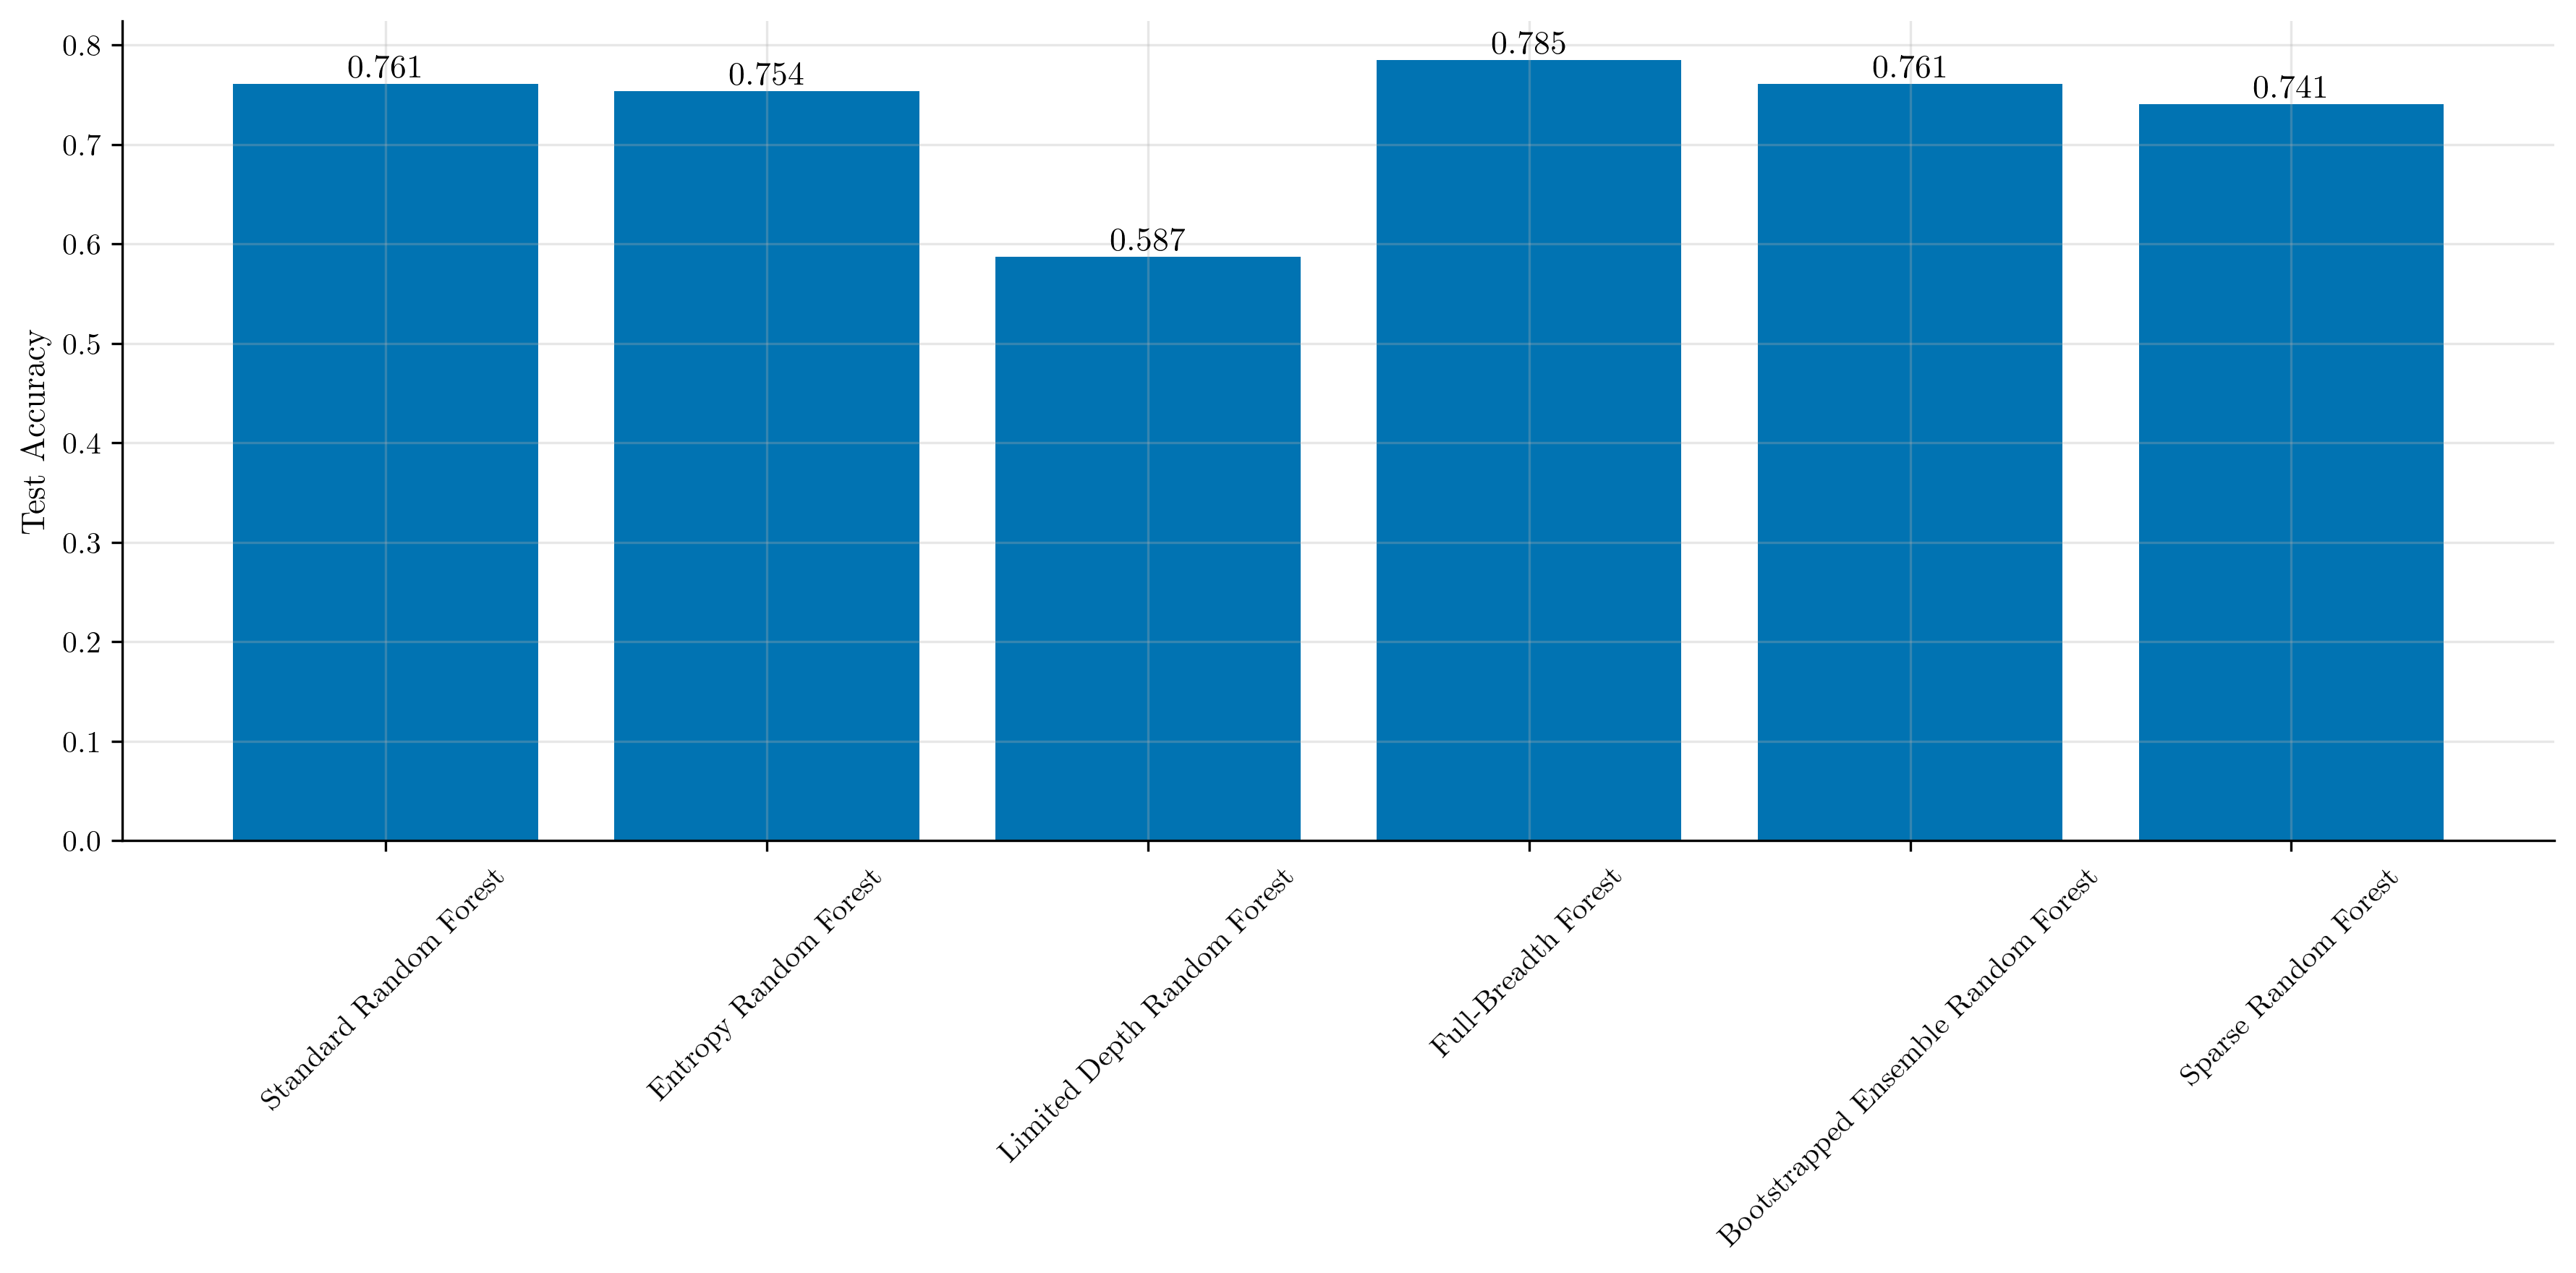

In [3]:
# Initialize different Random Forest classifiers with varying parameters
rf_classifiers = {
    'Standard Random Forest': RandomForestClassifier(
        n_estimators=200,
        max_depth=None,
        class_weight='balanced', # for imbalanced classes
        random_state=42
    ),
    'Entropy Random Forest': RandomForestClassifier(
        n_estimators=200,
        max_depth=None,
        criterion='entropy',
        class_weight='balanced',
        random_state=42
    ),
    'Limited Depth Random Forest': RandomForestClassifier(
        n_estimators=200,
        max_depth=10,
        min_samples_leaf=4,
        class_weight='balanced',
        random_state=42
    ),
    'Full-Breadth Forest': RandomForestClassifier(
        n_estimators=1000,
        max_depth=None,
        class_weight='balanced',
        random_state=42
    ),
    'Bootstrapped Ensemble Random Forest': RandomForestClassifier(
        n_estimators=300,
        max_samples=0.8,    # Bootstrap sampling
        max_depth=20,
        class_weight='balanced',
        random_state=42
    ),
    'Sparse Random Forest': RandomForestClassifier(
        n_estimators=200,
        max_features=0.5,   # use 50% of features
        class_weight='balanced',
        random_state=42
    )
}

# Train and evaluate each Random Forest variant
rf_results = {}

for name, clf in rf_classifiers.items():
    print(f"\nTraining {name}...")
    clf.fit(x_train_flat, y_train)
    
    # Make predictions
    y_pred = clf.predict(x_test_flat)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Store results
    rf_results[name] = {
        'accuracy': accuracy,
        'predictions': y_pred
    }
    
    print(f"{name} Test Accuracy: {accuracy:.4f}")

# Plot comparison of accuracies
rf_accuracies = [results['accuracy'] for results in rf_results.values()]
rf_names = list(rf_results.keys())



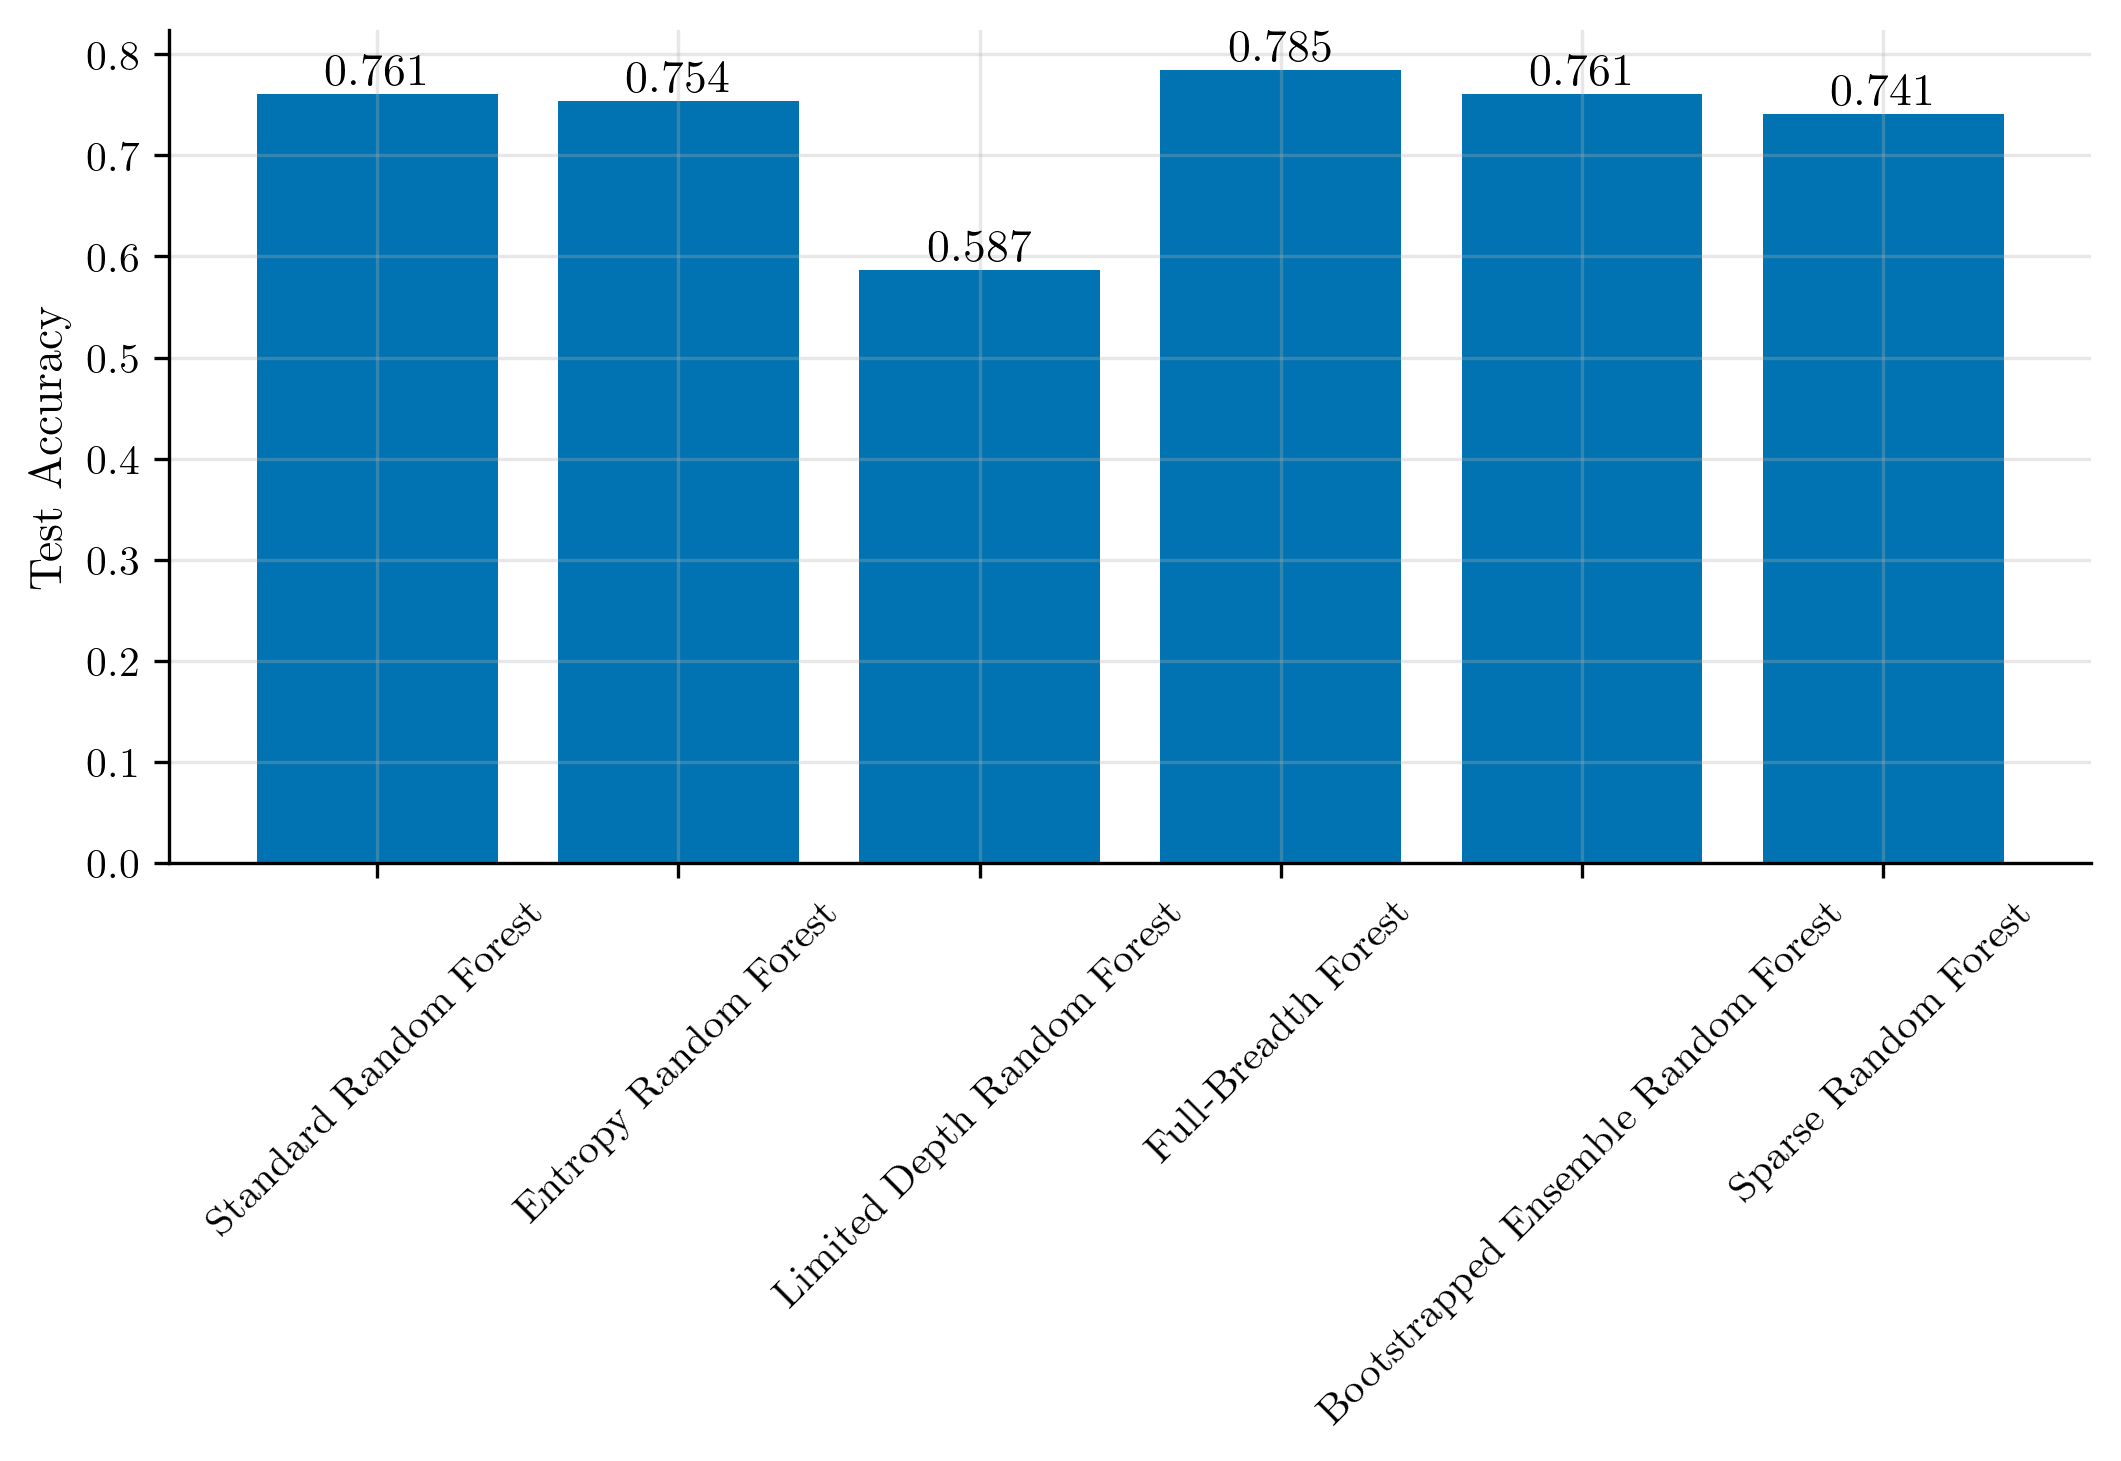

In [6]:
plt.figure()
plt.bar(rf_names, rf_accuracies)
for i, acc in enumerate(rf_accuracies):
    plt.text(i, acc, f'{acc:.3f}', 
             ha='center', va='bottom')
plt.xticks(rotation=45)
plt.ylabel('Test Accuracy')
plt.tight_layout()
plt.savefig('../report/images/rf_comparison.pdf', bbox_inches='tight', dpi=300)
plt.show()

# SVMs
44 mins on my laptop

In [4]:
# Since training SVMs is computationally expensive, we only train on smaller datasets
x_train_svm = x_train_flat[:20000]
y_train_svm = y_train[:20000]


svm_classifiers = {
    'Standard Linear SVM': SVC(
        kernel='linear',
        gamma='scale',
        class_weight='balanced', 
        C=1.0,
        random_state=42
    ),
    'RBF Kernel SVM': SVC(
        kernel='rbf',
        gamma='scale',
        class_weight='balanced',
        C=1.0,
        random_state=42
    ),
    'Polynomial Kernel SVM': SVC(
        kernel='poly',
        degree=3,
        gamma='scale',
        class_weight='balanced',
        C=1.0,
        random_state=42
    ),
    'High Degree Polynomial Kernel SVM': SVC(
        kernel='poly',
        degree=5,
        gamma='scale',
        class_weight='balanced',
        C=1.0,
        random_state=42
    ),
    'Large Margin Polynomial SVM': SVC(
        kernel='poly',
        degree=3,
        gamma='scale',
        class_weight='balanced',
        C=10.0,
        random_state=42
    ),
    'Large Margin RBF SVM': SVC(
        kernel='rbf',
        gamma='scale',
        class_weight='balanced',
        C=10.0,
        random_state=42
    ),
    'Low C RBF SVM': SVC(
        kernel='rbf',
        class_weight='balanced',
        C=0.1,
        random_state=42
    )
}

# Train and evaluate each Random Forest variant
svm_results = {}

for name, clf in svm_classifiers.items():
    print(f"\nTraining {name}...")
    clf.fit(x_train_svm, y_train_svm)
    
    # Make predictions
    y_pred = clf.predict(x_test_flat)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Store results
    svm_results[name] = {
        'accuracy': accuracy,
        'predictions': y_pred
    }
    
    print(f"{name} Test Accuracy: {accuracy:.4f}")


Training Standard Linear SVM...
Standard Linear SVM Test Accuracy: 0.2571

Training RBF Kernel SVM...
RBF Kernel SVM Test Accuracy: 0.6381

Training Polynomial Kernel SVM...
Polynomial Kernel SVM Test Accuracy: 0.6973

Training High Degree Polynomial Kernel SVM...
High Degree Polynomial Kernel SVM Test Accuracy: 0.6700

Training Large Margin Polynomial SVM...
Large Margin Polynomial SVM Test Accuracy: 0.7138

Training Large Margin RBF SVM...
Large Margin RBF SVM Test Accuracy: 0.7364

Training Low C High Gamma SVM...
Low C High Gamma SVM Test Accuracy: 0.3250


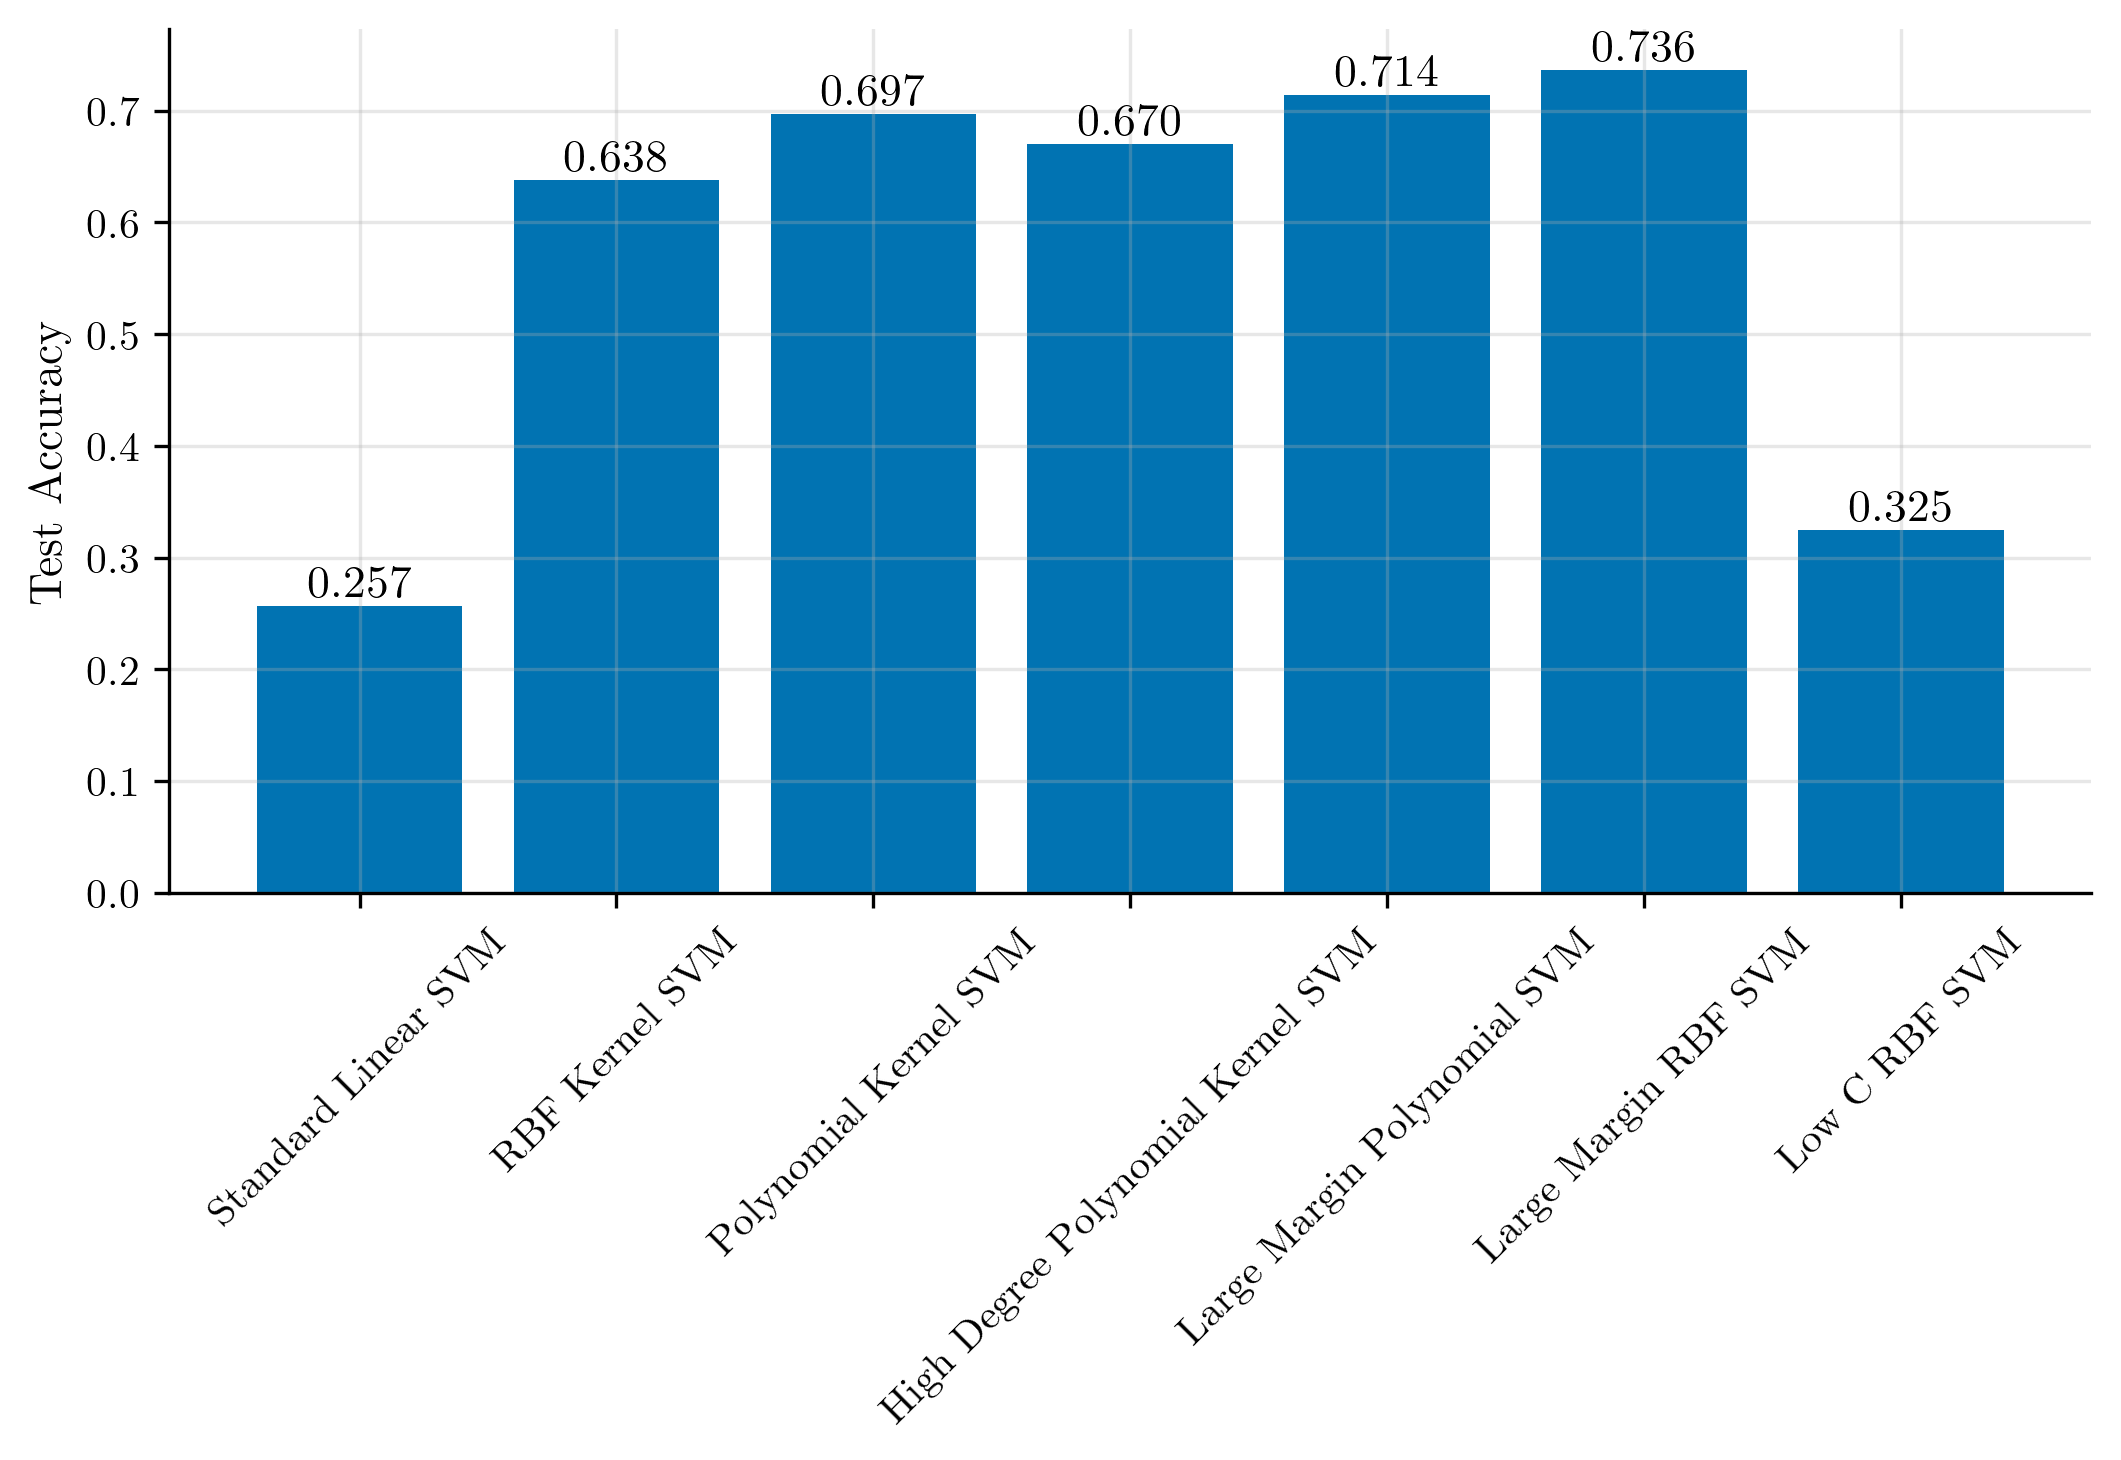

In [9]:
# Plot comparison of accuracies
svm_accuracies = [results['accuracy'] for results in svm_results.values()]
svm_names = list(svm_results.keys())

plt.figure()
plt.bar(svm_names, svm_accuracies)
for i, acc in enumerate(svm_accuracies):
    plt.text(i, acc, f'{acc:.3f}', 
             ha='center', va='bottom')  # ha: horizontal alignment, va: vertical alignment
plt.xticks(rotation=45)
plt.ylabel('Test Accuracy')
plt.tight_layout()
plt.savefig('../report/images/svm_comparison.pdf', bbox_inches='tight', dpi=300)
plt.show()